In [97]:
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
movies = pd.read_csv('kinopoisk-top250.csv')

## Фильмы с наибольшем рейтингом



In [99]:
movies.head(10)
actors = movies['actors'].str.split(";").apply(lambda x: [i.strip() for i in x])
movies['actors'] = actors
movies.head(10)

,rating,movie,year,country,rating_ball,overview,director,screenwriter,actors,url_logo
0,0,Побег из Шоушенка,1994,США,9.111,Бухгалтер Энди Дюфрейн обвинён в убийстве собс...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,"[Тим Роббинс, Морган Фриман, Боб Гантон, Уилья...",'https://st.kp.yandex.net/images/film_iphone/i...
1,1,Зеленая миля,1999,США,9.062,Пол Эджкомб — начальник блока смертников в тюр...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,"[Том Хэнкс, Дэвид Морс, Бонни Хант, Майкл Клар...",'https://st.kp.yandex.net/images/film_iphone/i...
2,2,Форрест Гамп,1994,США,8.913,От лица главного героя Форреста Гампа; слабоум...,Роберт Земекис,Эрик Рот; Уинстон Грум,"[Том Хэнкс, Робин Райт, Салли Филд, Гэри Синиз...",'https://st.kp.yandex.net/images/film_iphone/i...
3,3,Список Шиндлера,1993,США,8.817,Фильм рассказывает реальную историю загадочног...,Стивен Спилберг,Стивен Зеллиан; Томас Кенилли,"[Лиам Нисон, Бен Кингсли, Рэйф Файнс, Кэролайн...",'https://st.kp.yandex.net/images/film_iphone/i...
4,4,1+1,2011,Франция,8.807,Пострадав в результате несчастного случая; бог...,Оливье Накаш; Эрик Толедано,Оливье Накаш; Филипп Поццо ди Борго; Эрик Т...,"[Франсуа Клюзе, Омар Си, Анн Ле Ни, Одри Флеро...",'https://st.kp.yandex.net/images/film_iphone/i...
5,5,Начало,2010,США,8.662,Кобб — талантливый вор; лучший из лучших в опа...,Кристофер Нолан,Кристофер Нолан,"[Леонардо ДиКаприо, Джозеф Гордон-Левитт, Элле...",'https://st.kp.yandex.net/images/film_iphone/i...
6,6,Леон,1994,Франция,8.681,Профессиональный убийца Леон; не знающий пощад...,Люк Бессон,Люк Бессон,"[Жан Рено, Гари Олдман, Натали Портман, Дэнни ...",'https://st.kp.yandex.net/images/film_iphone/i...
7,7,Король Лев,1994,США,8.772,У величественного Короля-Льва Муфасы рождается...,Роджер Аллерс; Роб Минкофф,Ирен Меччи; Джонатан Робертс; Линда Вулверт...,"[Мэттью Бродерик, Джереми Айронс, Нэйтан Лейн,...",'https://st.kp.yandex.net/images/film_iphone/i...
8,8,Бойцовский клуб,1999,США,8.645,Сотрудник страховой компании страдает хроничес...,Дэвид Финчер,Джим Улс; Чак Паланик,"[Эдвард Нортон, Брэд Питт, Хелена Бонем Картер...",'https://st.kp.yandex.net/images/film_iphone/i...
9,9,Иван Васильевич меняет профессию,1973,СССР,8.782,Инженер-изобретатель Тимофеев сконструировал м...,Леонид Гайдай,Владлен Бахнов; Леонид Гайдай; Михаил Булгаков,"[Александр Демьяненко, Юрий Яковлев, Леонид Ку...",'https://st.kp.yandex.net/images/film_iphone/i...


## Какие актеры чаще всего снимаются

In [100]:
actors_count = movies.explode('actors')

In [101]:
actors_count = actors_count['actors'].value_counts().head(10)

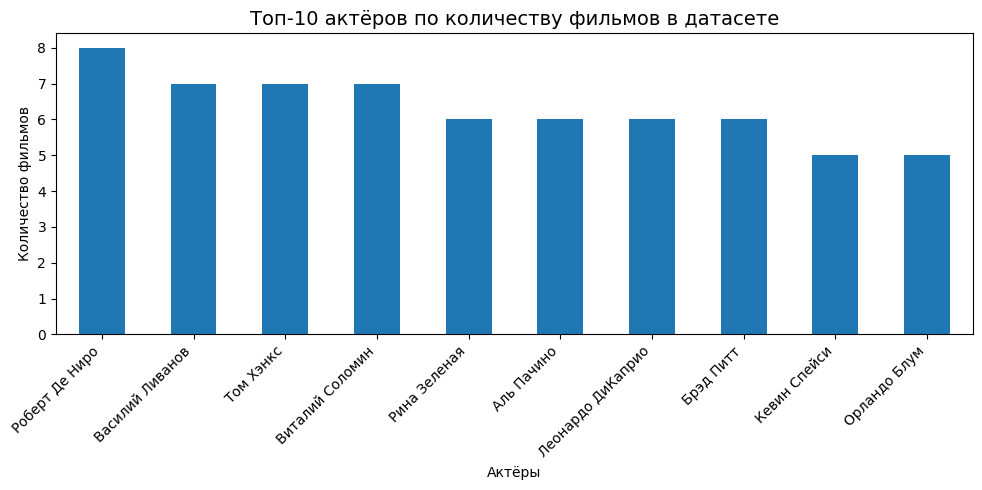

In [102]:
plt.figure(figsize=(10, 5))
actors_count.plot(kind="bar")
plt.title("Топ-10 актёров по количеству фильмов в датасете", fontsize=14)
plt.xlabel("Актёры")
plt.ylabel("Количество фильмов")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Как изменялись страны в зависимости от года

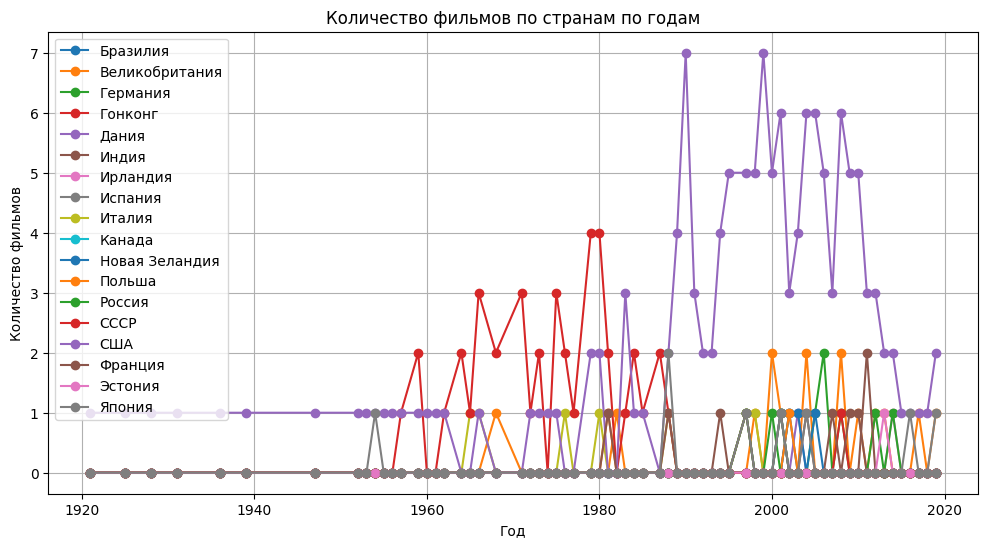

In [115]:
country_year_count = movies.groupby(['year', 'country']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
for country in country_year_count.columns:
    data_country = country_year_count[country]
    plt.plot(data_country.index, data_country, marker='o', label=country)

plt.title("Количество фильмов по странам по годам")
plt.xlabel("Год")
plt.ylabel("Количество фильмов")
plt.legend()
plt.grid(True)
plt.show()